In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from PIL import Image
import os
import pandas as pd
import pylab as pl

In [4]:
def load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

def plot_image_space(images, X, title="Projection of the Images into 2 Dimensions"):
    """Generates and shows a plot of images in a feature space.

    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    # Create a figure
    pl.figure(figsize=(16, 5))
    ax = pl.subplot(111)
    #ax.axis('off')

    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])

    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)

In [5]:
img_dir = os.path.join(os.getcwd(), "images") # directory path
images = load_images(img_dir) # load images in the specified directory

In [10]:
#Part 1:
from sklearn import decomposition
X = pd.DataFrame([im.histogram() for im in images])
estimator = decomposition.PCA(n_components = 2)
X_proj = estimator.fit_transform(X)

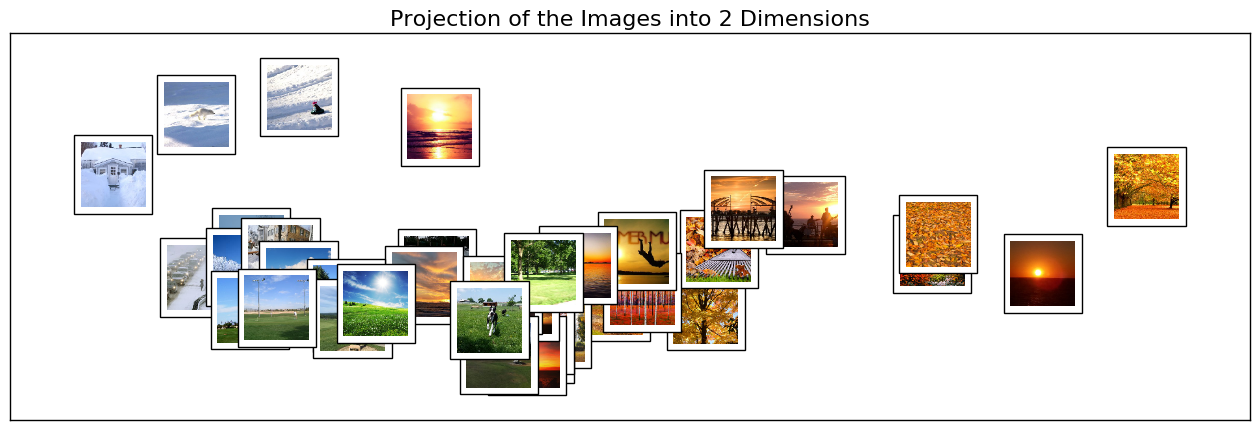

In [11]:
 plot_image_space(images,X_proj,title ='Projection of the Images into 2 Dimensions')

In [ ]:
# Part 2:
# Q1: What does it mean for two images to be close together in this plot? What does it mean for two images to be far apart?
# This plot represented the histogram space of these images. 
# The PCA is performed on a set of 768 unique histogram values 
# If two images that are close to each other means these two pictures have a similar color histogram
#     and their 768 unique histogram values are similar to each other. 
#     It also shows that their GRB color values are close to each other.
# If two images are far apart means that they have different color which shows that they have differnt color histogram.
# Q2: Do images corresponding to one of the seasons tend to group together more closely than others? Why might this be the case?
# Yes. Images corresponding to one of the seasons tend to group together more closely than others.
#     Because images corresponding to one of the seasons tends to have similar color. 
#     For example, winter time images are mostly white which appears on the left corner; 
#     Autumn time images are mostly red and yellow are grouped togher. 
#     so images with same season have more similar histogram. 

In [6]:
#Part 3:
img_dir = os.path.join(os.getcwd(), "image") # directory path
image = load_images(img_dir) # load images in the specified directory

In [7]:
from sklearn import decomposition
X = pd.DataFrame([im.histogram() for im in image])
estimator = decomposition.PCA(n_components = 2)
X_proj = estimator.fit_transform(X)

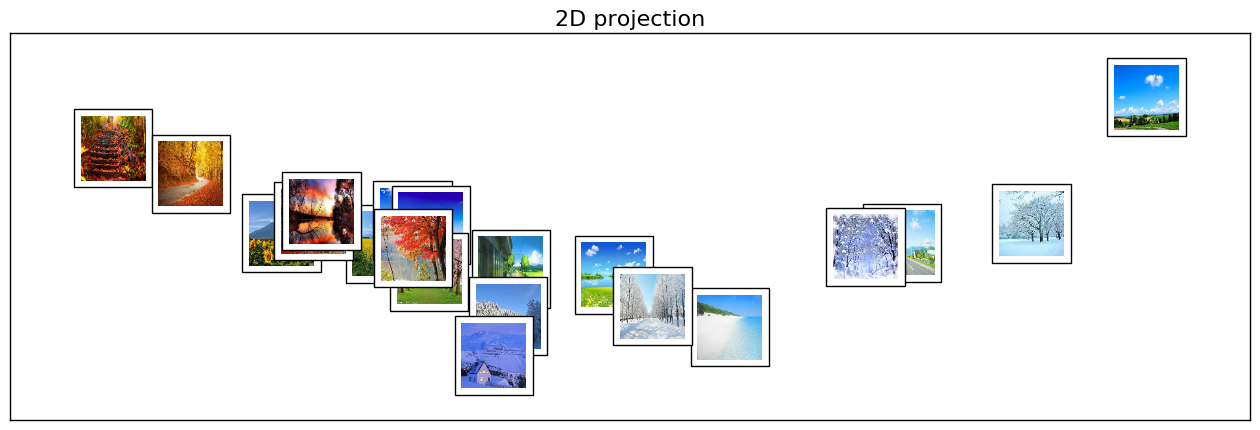

In [8]:
plot_image_space(image,X_proj,title ='2D projection')

In [ ]:
# As we could see that pictures with the same season are tends to gather close to each other since they have more similar color.